# Importing the libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the data

In [29]:
df = pd.read_csv('books.csv')

In [30]:
df

,title,price,rating
0,A Light in the ...,£51.77,3
1,Tipping the Velvet,£53.74,1
2,Soumission,£50.10,1
3,Sharp Objects,£47.82,4
4,Sapiens: A Brief History ...,£54.23,5
...,...,...,...
995,Alice in Wonderland (Alice's ...,£55.53,1
996,"Ajin: Demi-Human, Volume 1 ...",£57.06,4
997,A Spy's Devotion (The ...,£16.97,5
998,1st to Die (Women's ...,£53.98,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   price   1000 non-null   object
 2   rating  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [32]:
df.describe()

,rating
count,1000.000000
mean,2.923000
std,1.434967
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [33]:
df.isnull()

,title,price,rating
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [34]:
df.isnull().sum()

title     0
price     0
rating    0
dtype: int64

In [106]:
df.duplicated().sum()

np.int64(0)

# Changing data types

In [35]:
df.dtypes


title     object
price     object
rating     int64
dtype: object

In [36]:
df.head(1)

,title,price,rating
0,A Light in the ...,£51.77,3


In [37]:
df['price_only'] = df['price'].str.replace('£', '').astype(float).astype(int)

In [38]:
df.dtypes

title         object
price         object
rating         int64
price_only     int64
dtype: object

# Checking for correlations 

In [39]:
df['rating'].corr(df['price_only'])

np.float64(0.028600445370645346)

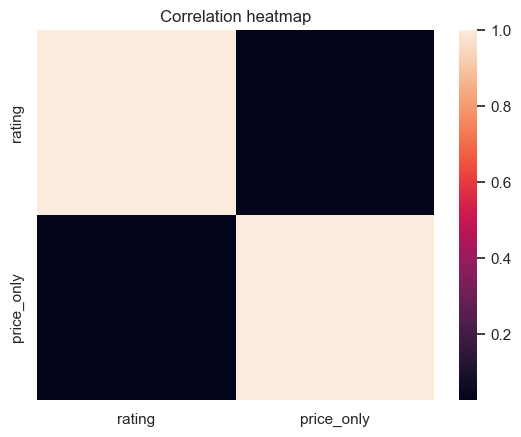

In [137]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr)
plt.title('Correlation heatmap')
plt.show()

In [49]:
df.head()

,title,price,rating,price_only
0,A Light in the ...,£51.77,3,51
1,Tipping the Velvet,£53.74,1,53
2,Soumission,£50.10,1,50
3,Sharp Objects,£47.82,4,47
4,Sapiens: A Brief History ...,£54.23,5,54


In [51]:
df.tail()

,title,price,rating,price_only
995,Alice in Wonderland (Alice's ...,£55.53,1,55
996,"Ajin: Demi-Human, Volume 1 ...",£57.06,4,57
997,A Spy's Devotion (The ...,£16.97,5,16
998,1st to Die (Women's ...,£53.98,1,53
999,"1,000 Places to See ...",£26.08,5,26


In [52]:
df.describe()

,rating,price_only
count,1000.000000,1000.000000
mean,2.923000,34.576000
std,1.434967,14.447732
min,1.000000,10.000000
25%,2.000000,22.000000
50%,3.000000,35.500000
75%,4.000000,47.000000
max,5.000000,59.000000


# Visualizations

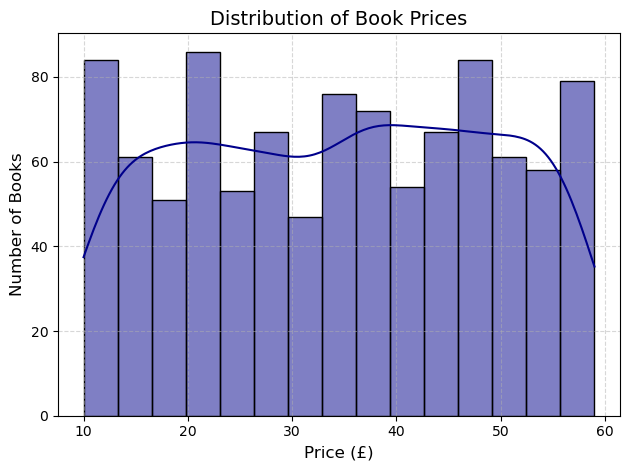

In [130]:
sns.histplot(df['price_only'], bins=15, kde=True, color='darkblue')
plt.title('Distribution of Book Prices', fontsize=14)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


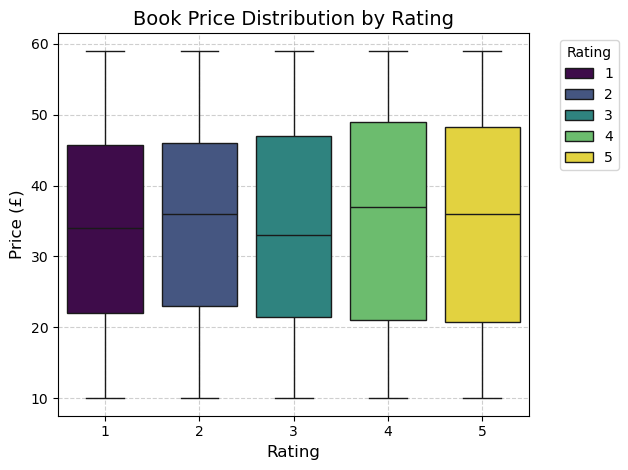

In [105]:
sns.boxplot(x='rating', y='price_only', data=df, palette='viridis', hue = 'rating')
plt.title('Book Price Distribution by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


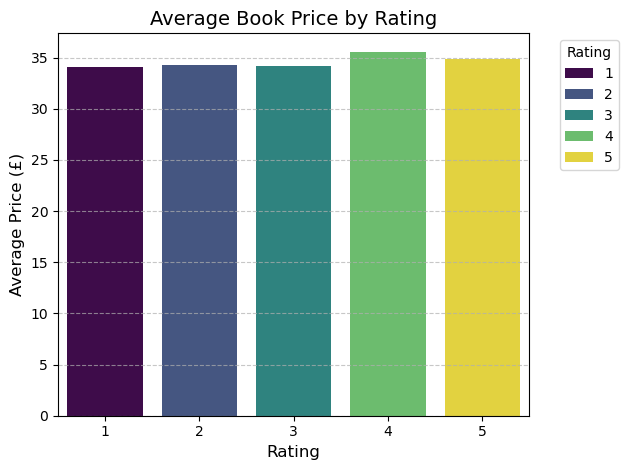

In [104]:
avg_price = df.groupby('rating')['price_only'].mean().reset_index()

sns.barplot(x='rating', y='price_only', data=avg_price, palette='viridis' , hue = 'rating')
plt.title('Average Book Price by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


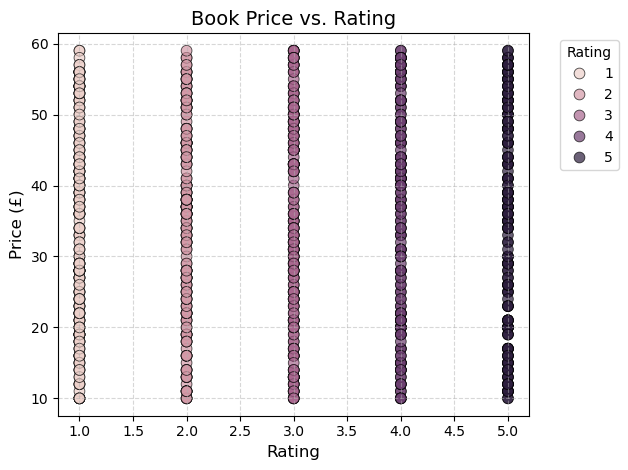

In [102]:
sns.scatterplot(x='rating', y='price_only', data=df, color='teal', s=60, alpha=0.7, edgecolor='black', hue = 'rating')
plt.title('Book Price vs. Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


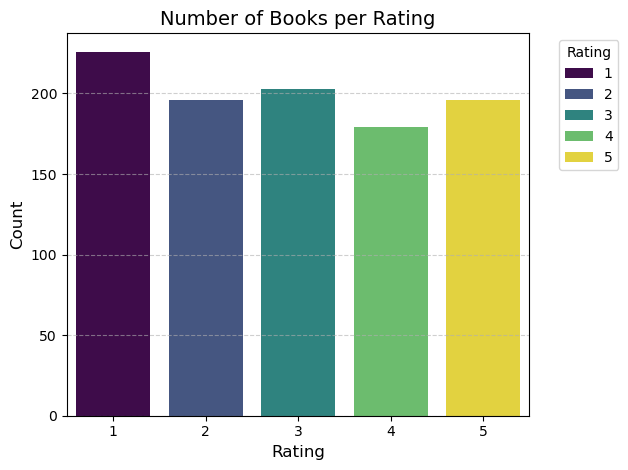

In [103]:
sns.countplot(x='rating', data=df, palette='viridis', hue = 'rating')
plt.title('Number of Books per Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


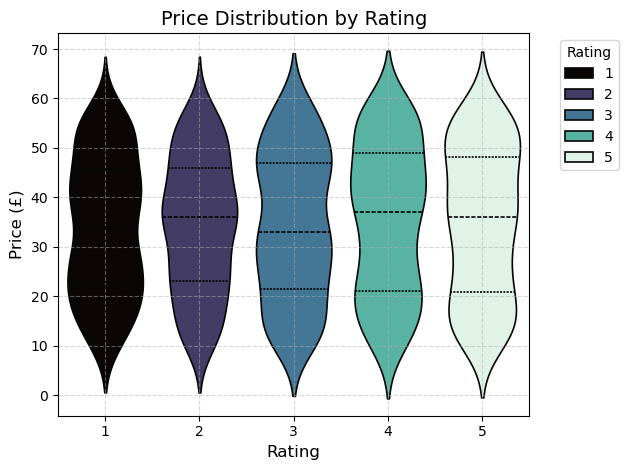

In [97]:
sns.violinplot(x='rating', y='price_only', data=df, palette='mako', inner='quartile', linewidth=1.2, hue = 'rating')
plt.title('Price Distribution by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
